In [11]:
import pandas as pd
import numpy as np
#트레인 스플릿
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
# 사이킷런의 정확도, 정밀도, 재현율, 오차행렬을 계산하는 API 호출
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



In [12]:
#데이터셋 불러오기
train_df = pd.read_csv('data/train.csv')
train_df.drop('id', inplace = True, axis=1)
test_df = pd.read_csv('data/test.csv')
test_df.drop('id', inplace = True, axis=1)
print(train_df.head(3))
print(test_df.head(3))


  Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0      M   0.605     0.470   0.115        1.1140          0.3925   
1      I   0.430     0.315   0.095        0.3780          0.1750   
2      I   0.580     0.490   0.195        1.3165          0.5305   

   Viscra Weight  Shell Weight  Target  
0          0.291        0.3100      15  
1          0.080        0.1045       8  
2          0.254        0.4100      18  
  Gender  Lenght  Diameter  Height  Whole Weight  Shucked Weight  \
0      F   0.595     0.470   0.155         1.121          0.4515   
1      M   0.580     0.450   0.150         0.927          0.2760   
2      I   0.260     0.205   0.070         0.097          0.0415   

   Viscra Weight  Shell Weight  
0         0.1780        0.1550  
1         0.1815        0.3600  
2         0.0190        0.0305  


In [13]:
train_df.corr()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Lenght,1.000000,0.987293,0.901911,0.926321,0.896337,0.903732,0.895664,0.543789
Diameter,0.987293,1.000000,0.908348,0.927205,0.891183,0.901029,0.904546,0.567933
Height,0.901911,0.908348,1.000000,0.895409,0.837456,0.868192,0.902180,0.604654
Whole Weight,0.926321,0.927205,0.895409,1.000000,0.968007,0.966942,0.951652,0.538404
Shucked Weight,0.896337,0.891183,0.837456,0.968007,1.000000,0.932138,0.870453,0.420126
Viscra Weight,0.903732,0.901029,0.868192,0.966942,0.932138,1.000000,0.905061,0.497283
Shell Weight,0.895664,0.904546,0.902180,0.951652,0.870453,0.905061,1.000000,0.625819
Target,0.543789,0.567933,0.604654,0.538404,0.420126,0.497283,0.625819,1.000000


In [14]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1253 non-null   object 
 1   Lenght          1253 non-null   float64
 2   Diameter        1253 non-null   float64
 3   Height          1253 non-null   float64
 4   Whole Weight    1253 non-null   float64
 5   Shucked Weight  1253 non-null   float64
 6   Viscra Weight   1253 non-null   float64
 7   Shell Weight    1253 non-null   float64
 8   Target          1253 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 88.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2924 entries, 0 to 2923
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2924 non-null   object 
 1   Lenght          2924 non-null   float64
 2   Diameter        2924 non-null   float64


C:\ProgramData\Anaconda3\envs\bigdata0809\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


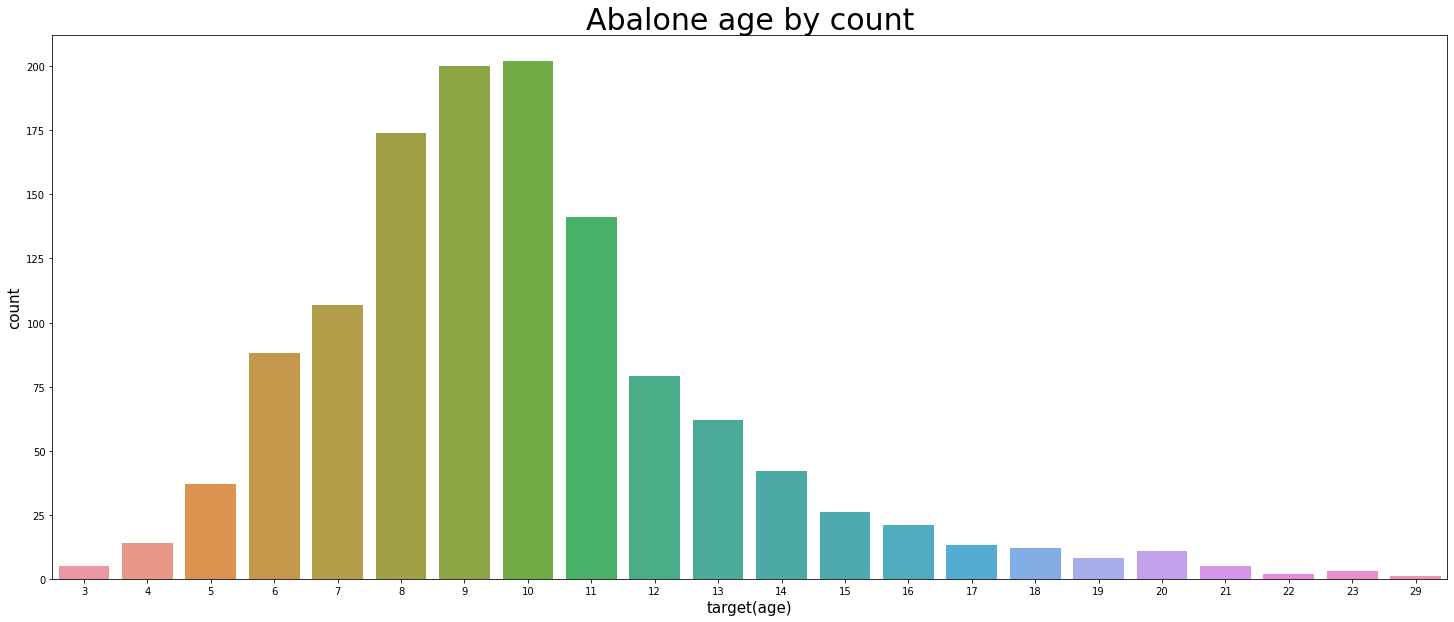

In [15]:
plt.rcParams['figure.figsize'] = [25,10]
sns.countplot('Target' , data=train_df)
plt.title('Abalone age by count', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()
#나이 분포도

C:\ProgramData\Anaconda3\envs\bigdata0809\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


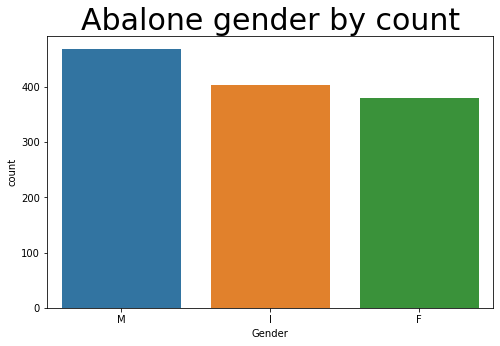

In [16]:
plt.rcParams['figure.figsize'] = [8,5]
sns.countplot('Gender', data=train_df)
plt.title('Abalone gender by count', fontsize=30)
plt.show()

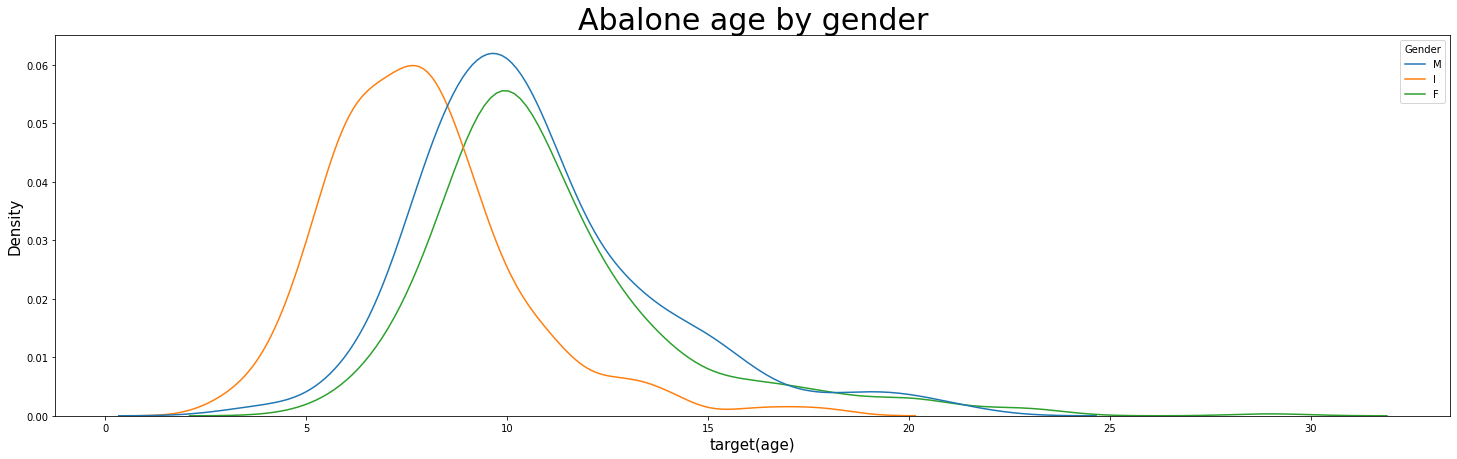

In [17]:
# 성별에 따른 나이 분포 그래프
plt.rcParams['figure.figsize'] = [25,7]
sns.kdeplot('Target', hue='Gender', data=train_df)
plt.title('Abalone age by gender', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

In [18]:
# 원핫 인코딩
le_encoding = LabelEncoder()
encoded = le_encoding.fit(train_df['Gender'])
train_df['Gender'] = encoded.transform(train_df['Gender'])

le_encoding = LabelEncoder()
encoded = le_encoding.fit(test_df['Gender'])
test_df['Gender'] = encoded.transform(test_df['Gender'])

# 데이터 분포도
data_description = train_df.describe()
data_description

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,1.071030,0.522869,0.406963,0.139545,0.831199,0.358818,0.181006,0.240077,9.912211
std,0.820406,0.120231,0.099771,0.039033,0.500491,0.224612,0.111936,0.142574,3.214676
min,0.000000,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.000000,0.445000,0.345000,0.115000,0.440500,0.182500,0.092500,0.130000,8.000000
50%,1.000000,0.535000,0.420000,0.140000,0.777500,0.326000,0.168000,0.230000,10.000000
75%,2.000000,0.615000,0.480000,0.165000,1.160000,0.505500,0.256500,0.330000,11.000000
max,2.000000,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


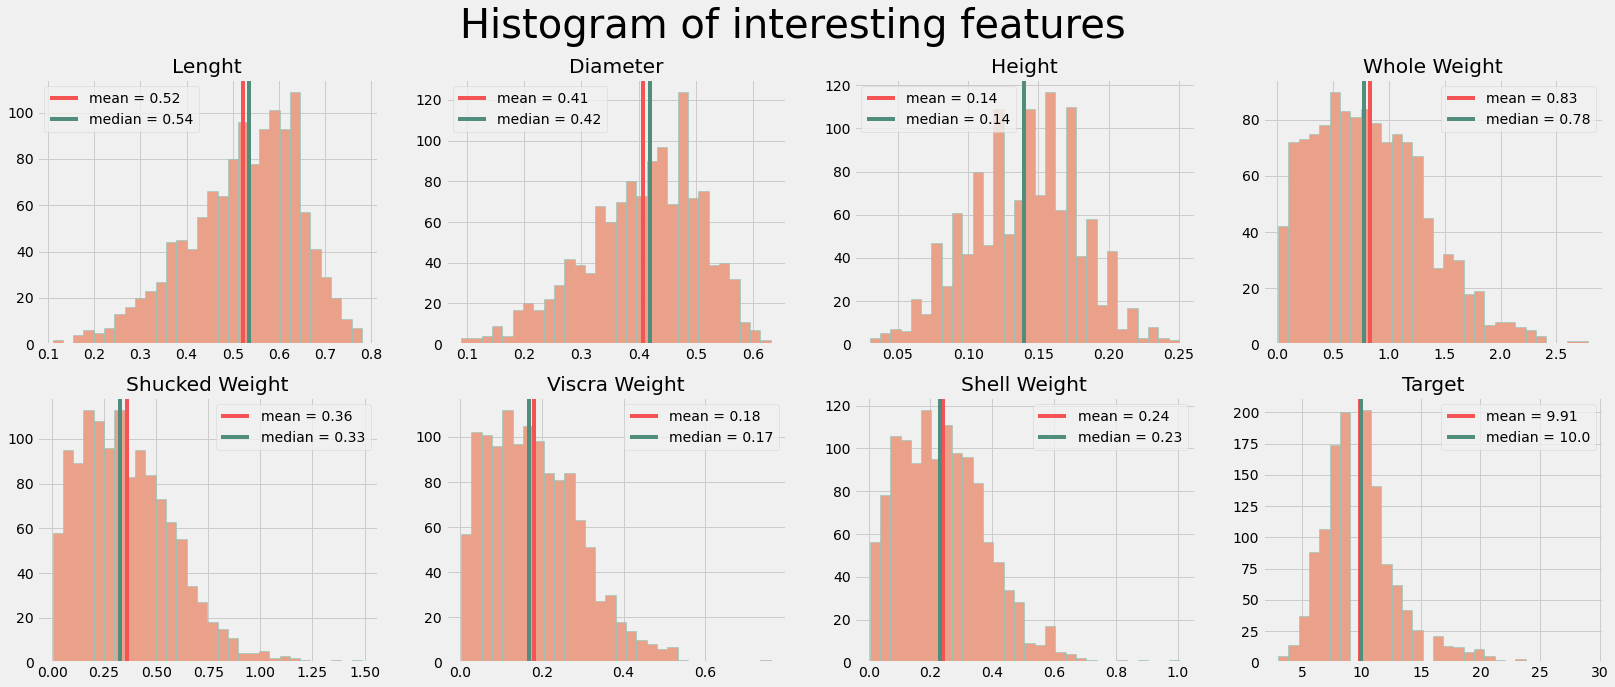

In [19]:
# 수치형 데이터 통계치 그래프
interest_coloumns = train_df.columns[1:]
plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(2, 4, figsize = (25, 10))
fig.suptitle('Histogram of interesting features', fontsize=40)
column_idx = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist(train_df[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1

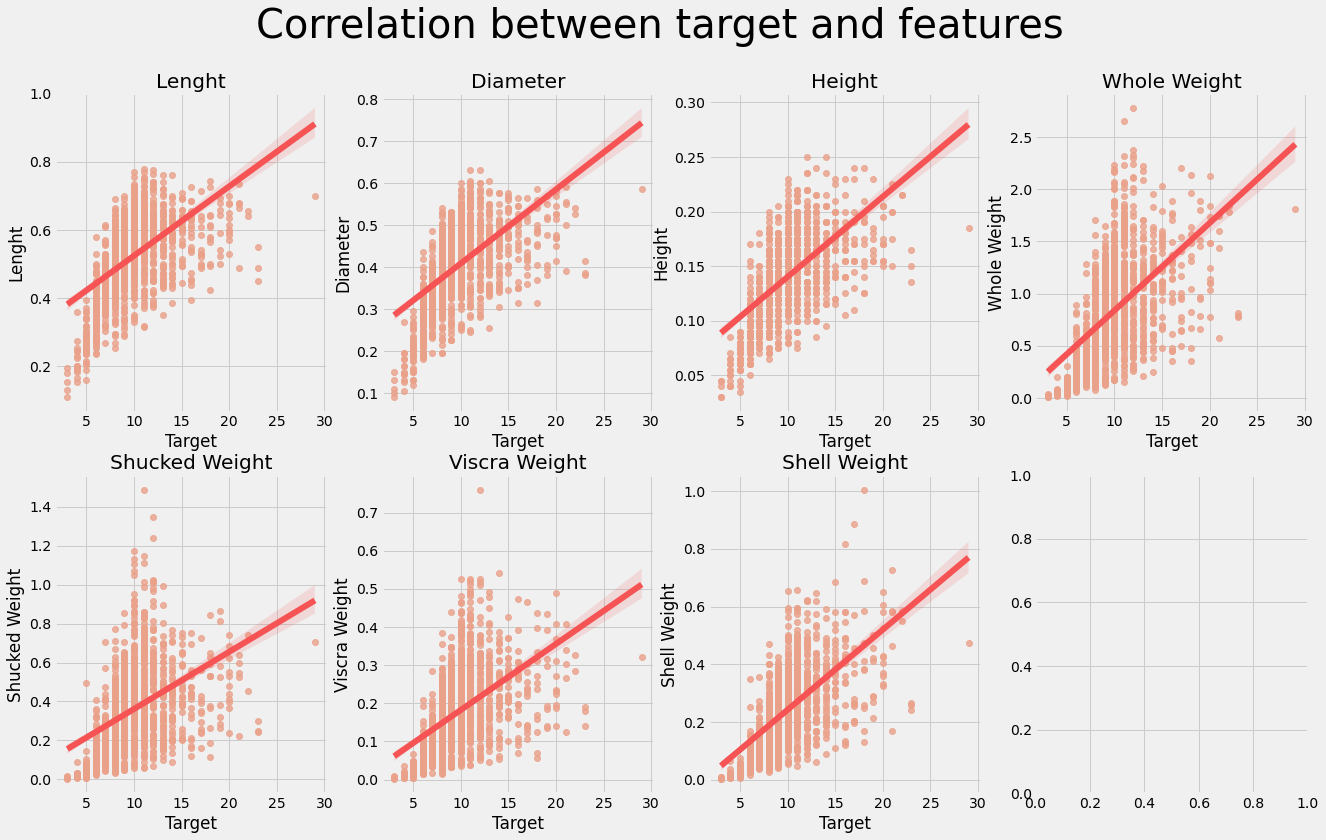

In [20]:
def visualize(axx, yfield):
  sns.regplot(x='Target', y=yfield, data=train_df,  color='#eaa18a', line_kws=  {'color': '#f55354'} , ax = axx) # regplot을 이용하여 추세선과 산점도 그래프를 그려줍니다.
  axx.set_title(yfield)

figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,12)
figure.suptitle('Correlation between target and features', fontsize=40)
for i in range(len(train_df.columns[1:-1])):
  visualize(eval(f'ax{i+1}'), train_df.columns[i+1])

In [21]:
# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train_df.drop(columns=['Gender'],axis=1)
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

Text(0.5, 1.0, 'Correlation between features')

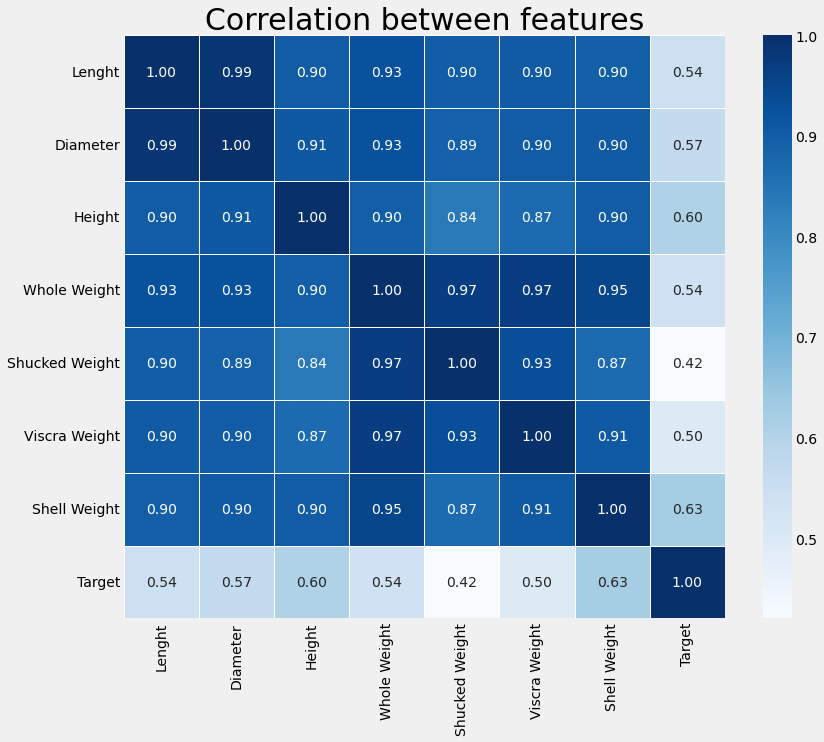

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

In [23]:
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending=False), columns=['Target'])
df_temp28.style.background_gradient(cmap='viridis')

,Target
Target,1.000000
Shell Weight,0.625819
Height,0.604654
Diameter,0.567933
Lenght,0.543789
Whole Weight,0.538404
Viscra Weight,0.497283
Shucked Weight,0.420126


In [24]:
X_train = train_df.drop('Target',axis=1)
y_train = train_df.Target
X_test = test_df

In [33]:
import lightgbm as lgb
#max_depth 깊이 num_leavers=반복트리 개수,n_estimators = 반복횟수
lgb_clf = lgb.LGBMClassifier(max_depth=5,num_leaves=31,n_estimators=200, objective='binary')
lgb_clf.fit(X_train, y_train)
y_pred = lgb_clf.predict(X_test)

In [34]:
submission = pd.read_csv('data/sample_submission.csv')

In [35]:
submission.Target = y_pred

In [36]:
submission

,id,Target
0,1,10
1,2,13
2,3,5
3,4,9
4,5,9
...,...,...
2919,2920,5
2920,2921,6
2921,2922,9
2922,2923,9


In [32]:
submission.to_csv('submit.csv', index=False)